In [1]:
import pandas as pd 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("farms_train.csv",sep = ";")
data.head()

,DIFF,R2,R7,R8,R17,R22,R32
0,0,"0,705","0,29","0,1334","0,0481","0,5258","0,2941"
1,1,"0,801","0,213","0,1282","0,0186","2,1411","0,3005"
2,1,"0,591","0,429","0,2999","0,08","0,5957","0,4126"
3,0,"0,373","0,346","1,3704","0,0812","0,343","0,2265"
4,0,0,"1,417","0,2493","0,0501","0,8728","0,1086"


In [6]:
data.tail()

,DIFF,R2,R7,R8,R17,R22,R32
298,0,"0,272","0,472","0,466","0,088","1,0243","0,05513"
299,1,"0,682","0,745","0,09558","0,0641","0,6582","0,3031"
300,0,"0,442","0,671","0,14","0,0545","0,5478","0,174"
301,1,"0,19","0,439","0,2994","0,0276","0,9328","0,3137"
302,1,"0,586","0,637","0,1747","0,0521","0,593","0,3325"


In [7]:
# Vérification des valeurs manquantes
#print(data.isnull().sum())

In [37]:
# Obtenir des statistiques descriptives
data.describe()


,DIFF,R2,R7,R8,R17,R22,R32
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.524752,0.527877,0.672664,0.380717,0.063825,0.710766,0.248527
std,0.500213,0.297593,0.506008,0.340379,0.026986,0.887343,0.130599
min,0.000000,0.000000,0.051300,0.024290,0.018600,0.055390,-0.162000
25%,0.000000,0.316500,0.312000,0.141100,0.044000,0.287800,0.171350
50%,1.000000,0.603000,0.574000,0.273600,0.060000,0.493500,0.266900
75%,1.000000,0.761000,0.909500,0.521750,0.081300,0.811600,0.338250
max,1.000000,0.950000,2.557000,1.849400,0.194000,10.840000,0.660800


In [8]:
# Supprimer les lignes contenant des valeurs NaN
data = data.dropna()

# Séparer les features et la cible après avoir enlevé les NaN
X = data[['R2', 'R7', 'R8', 'R17', 'R22', 'R32']]
y = data['DIFF']


In [9]:
# Remplacer les virgules par des points dans les données
data = data.replace({',': '.'}, regex=True)

# Convertir toutes les colonnes en type float
data = data.astype(float)

# Vérification
print(data.dtypes)  # Cela devrait afficher 'float' pour toutes les colonnes


DIFF    float64
R2      float64
R7      float64
R8      float64
R17     float64
R22     float64
R32     float64
dtype: object


In [10]:
# Matrice de corrélation
corr_matrix = data.corr()
print(corr_matrix)


          DIFF        R2        R7        R8       R17       R22       R32
DIFF  1.000000  0.638907 -0.448378 -0.027073 -0.274892 -0.011635  0.587965
R2    0.638907  1.000000 -0.635708  0.051121 -0.270121 -0.029225  0.467361
R7   -0.448378 -0.635708  1.000000 -0.016932  0.094256  0.008844 -0.468352
R8   -0.027073  0.051121 -0.016932  1.000000 -0.000665 -0.019655 -0.058138
R17  -0.274892 -0.270121  0.094256 -0.000665  1.000000  0.060494 -0.264957
R22  -0.011635 -0.029225  0.008844 -0.019655  0.060494  1.000000 -0.147334
R32   0.587965  0.467361 -0.468352 -0.058138 -0.264957 -0.147334  1.000000


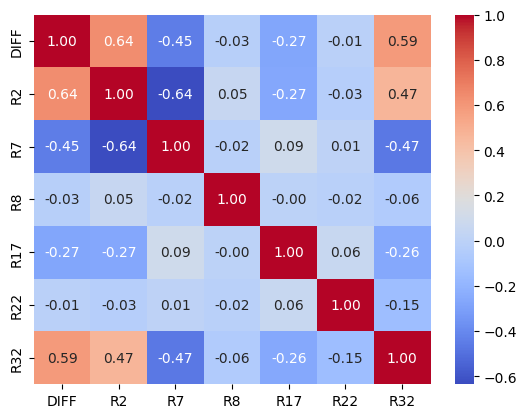

In [11]:

# Affichage de la matrice de corrélation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [12]:
# Séparation des features et de la cible
X = data[['R2', 'R7', 'R8', 'R17', 'R22', 'R32']]  # Variables explicatives
y = data['DIFF']  # Cible

In [13]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
from sklearn.model_selection import train_test_split

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression

# Créer et entraîner le modèle
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [16]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Matrice de confusion
print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred))

# Rapport de classification (accuracy, précision, rappel, F1-score)
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))


Matrice de confusion:
[[23  6]
 [ 7 25]]

Rapport de classification:
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78        29
         1.0       0.81      0.78      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



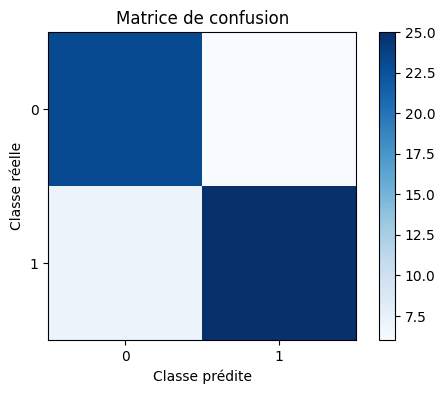

In [18]:
# Affichage de la matrice de confusion avec matplotlib
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
plt.ylabel('Classe réelle')
plt.xlabel('Classe prédite')
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])
plt.show()

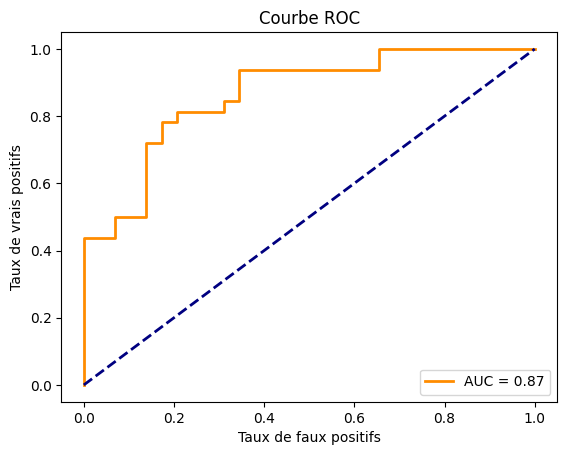

In [24]:
from sklearn.metrics import roc_curve, auc

# Calculer la courbe ROC et l'AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


In [28]:
# Charger les nouvelles données
data_test = pd.read_csv("farms_test.csv")
data_test


,DIFF,R2,R7,R8,R17,R22,R32
0,1,0.832,0.418,0.28410,0.0468,0.6394,0.4070
1,0,0.172,0.989,0.57450,0.0843,0.6279,0.1661
2,1,0.697,0.794,0.17430,0.0805,0.8982,0.4313
3,0,0.216,0.491,0.24780,0.0999,0.5343,0.2323
4,1,0.725,0.469,1.23950,0.0458,0.6316,0.3102
...,...,...,...,...,...,...,...
90,1,0.769,0.324,0.56280,0.0269,0.4128,0.2427
91,0,0.180,0.993,0.17120,0.0599,0.1527,0.1900
92,1,0.763,0.344,0.04217,0.0839,0.3002,0.3498
93,0,0.764,0.512,0.69100,0.1140,0.2694,0.1717


In [29]:
# Remplacer les virgules par des points et convertir en type float
#data_test = data_test.replace({',': '.'}, regex=True)
#data_test = data_test.astype(float)

# Sélectionner les mêmes features que celles utilisées pour l'entraînement
X_test_new = data_test[['R2', 'R7', 'R8', 'R17', 'R22', 'R32']]

# Normaliser les nouvelles données avec le même scaler que celui utilisé pour l'entraînement
X_test_new_scaled = scaler.transform(X_test_new)

# Faire des prédictions sur les nouvelles données
y_pred_new = model.predict(X_test_new_scaled)

# Afficher les résultats des prédictions
print("Prédictions sur les nouvelles données:")
print(y_pred_new)


Prédictions sur les nouvelles données:
[1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.]


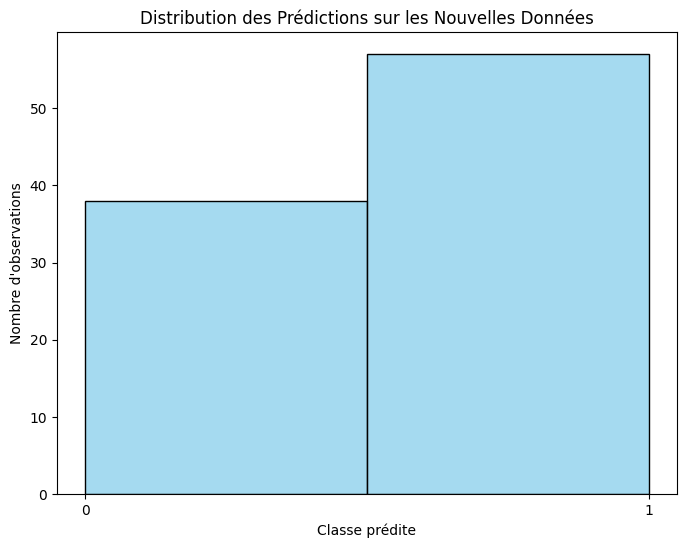

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Afficher un histogramme des prédictions
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_new, kde=False, bins=2, color='skyblue', edgecolor='black')
plt.title('Distribution des Prédictions sur les Nouvelles Données')
plt.xlabel('Classe prédite')
plt.ylabel('Nombre d\'observations')
plt.xticks([0, 1], ['0', '1'])
plt.show()

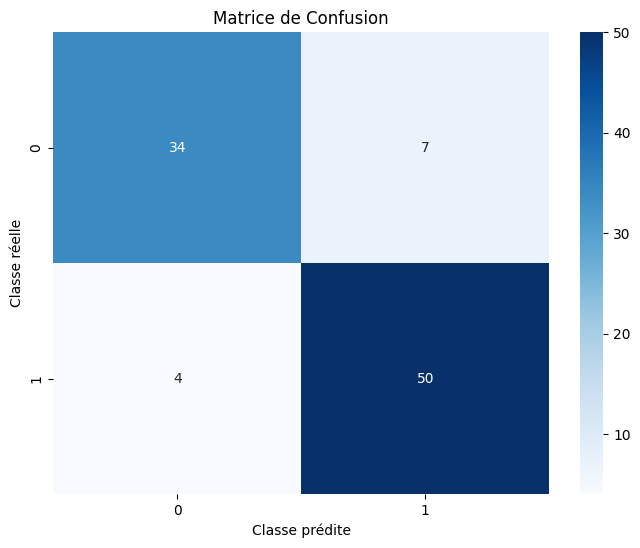

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Charger les nouvelles données
data_test = pd.read_csv("farms_test.csv")

y_true = data_test['DIFF'].values

# Prédictions faites par le modèle sur les nouvelles données
y_pred_new = [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
              0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
              1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
              1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0]

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred_new)

# Afficher la matrice de confusion avec un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matrice de Confusion')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.show()
